In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

(1220, 1200, 3)


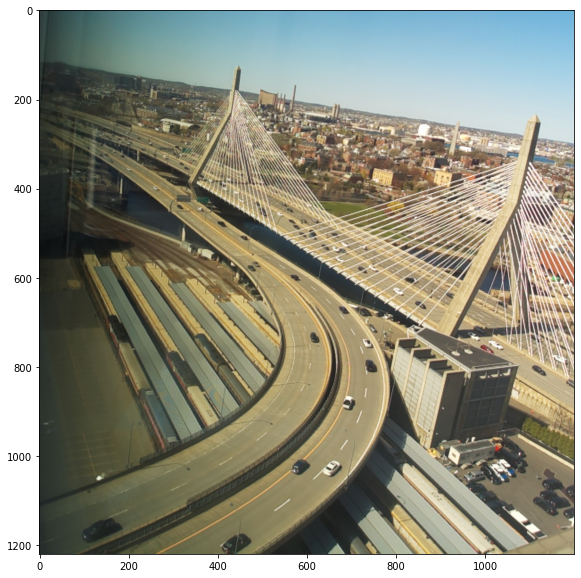

In [63]:
#load first image in test_frames
img = cv2.imread("test_frames/1745176127362.jpg")
print(img.shape)
#rotate image by 180 degrees
img = cv2.rotate(img, cv2.ROTATE_180)
#show image
# make a big figure
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

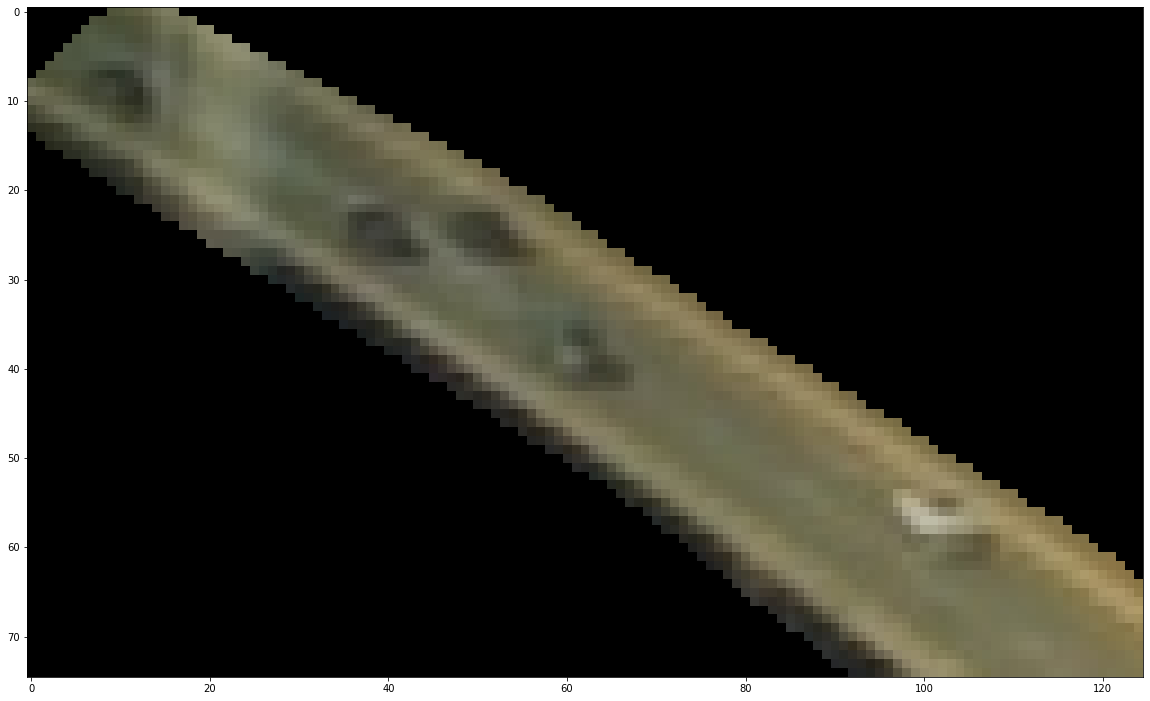

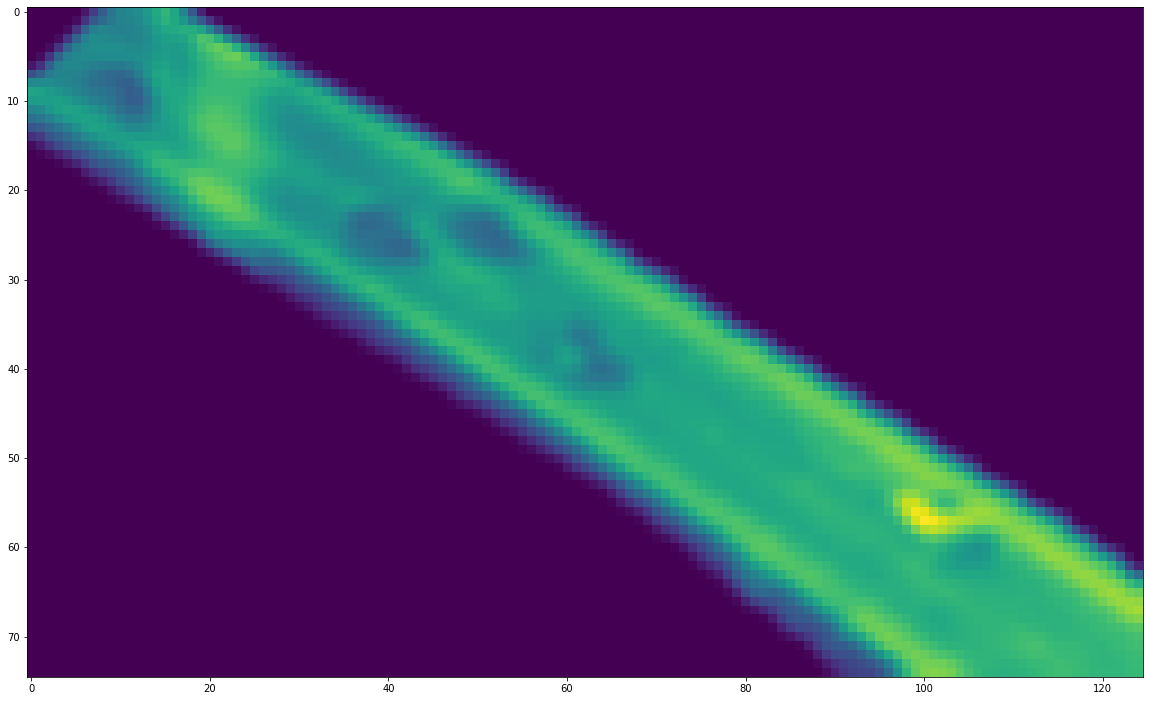

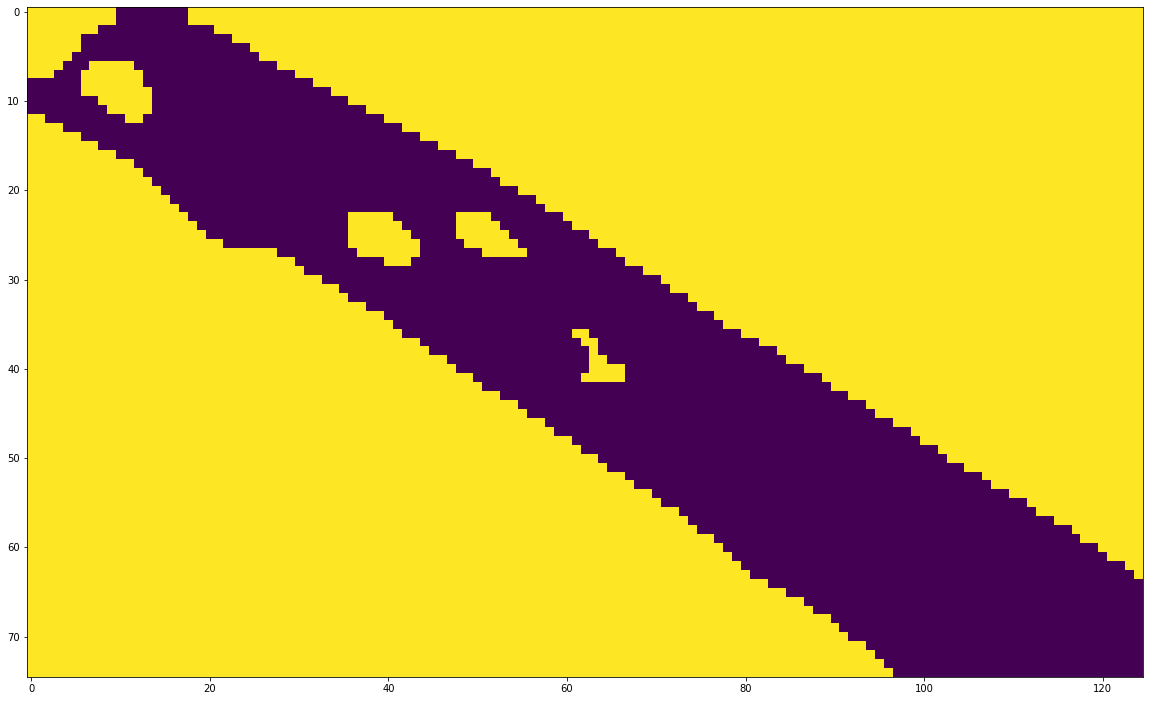

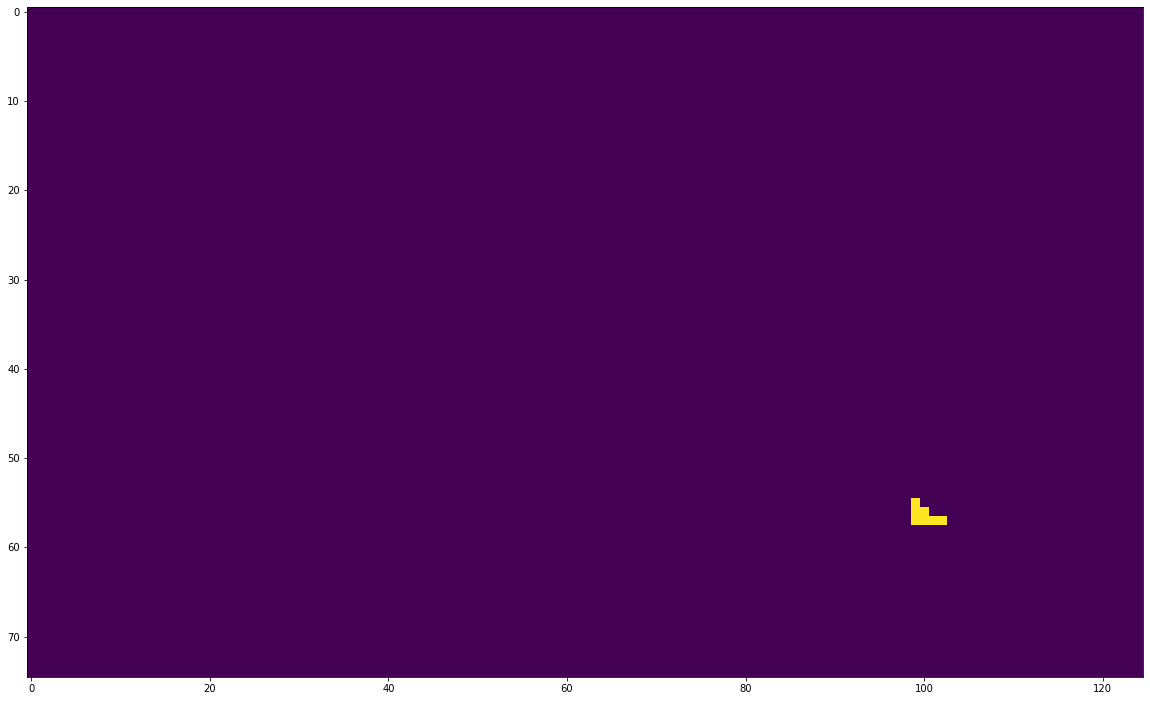

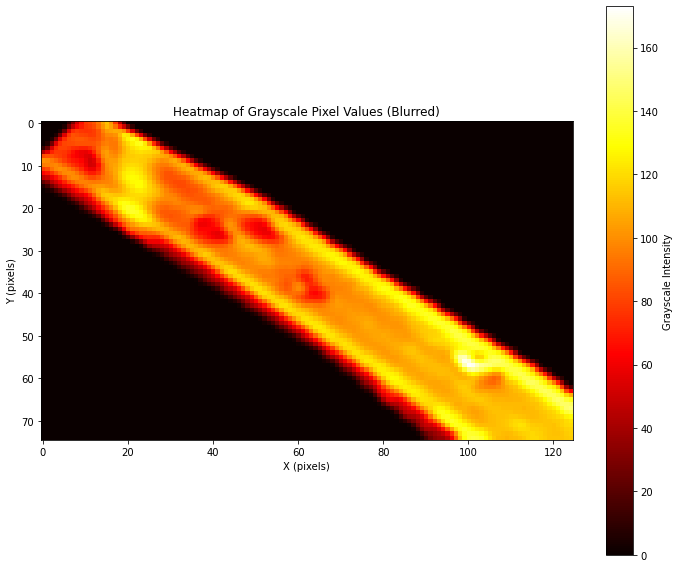

In [106]:
frame = img.copy()
mask = cv2.imread('road_mask.png', cv2.IMREAD_GRAYSCALE)

masked_frame = cv2.bitwise_and(frame, frame, mask=mask)
mf = masked_frame.copy()
masked_frame = mf.copy()[300:375,100:225]

# display result with matplotlib
plt.figure(figsize=(20, 20))   
plt.imshow(cv2.cvtColor(masked_frame, cv2.COLOR_BGR2RGB))
#plt.axis('off')


gray = cv2.cvtColor(masked_frame, cv2.COLOR_BGR2GRAY)

# Blur to smooth out noise
blurred = cv2.GaussianBlur(gray, (3,3), 1)

plt.figure(figsize=(20, 20))
plt.imshow(blurred)

dark_thresh = 75
bright_thresh = 160

# Find dark and bright pixels
dark_pixels = cv2.inRange(blurred, 0, dark_thresh)
bright_pixels = cv2.inRange(blurred, bright_thresh, 255)

plt.figure(figsize=(20, 20))
plt.imshow(dark_pixels)

plt.figure(figsize=(20, 20))
plt.imshow(bright_pixels)


import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume 'blurred' is a 2D NumPy array (grayscale image)
# If not, convert:
# blurred = cv2.cvtColor(blurred_bgr, cv2.COLOR_BGR2GRAY)

# Create meshgrid for pixel coordinates
plt.figure(figsize=(10, 8))
plt.imshow(blurred, cmap='hot', interpolation='nearest')
plt.colorbar(label='Grayscale Intensity')
plt.title('Heatmap of Grayscale Pixel Values (Blurred)')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.tight_layout()
plt.show()


"\n# Morphological operations (close small holes, connect near blobs)\nkernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))\ncleaned = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel)\ncleaned = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)\n\n# Find contours from cleaned binary image\ncontours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)\n\n# Draw bounding boxes for blobs with area >= 9 pixels\noutput_img = img.copy()\nmin_area = 9\n\nfor cnt in contours:\n    area = cv2.contourArea(cnt)\n    if area >= min_area:\n        x, y, w, h = cv2.boundingRect(cnt)\n        cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 0, 255), 1)  # Red box\n\n# Optionally display\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(12, 8))\nplt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))\nplt.title('Detected Blobs with Red Bounding Boxes')\nplt.axis('off')\nplt.tight_layout()\nplt.show()\n"

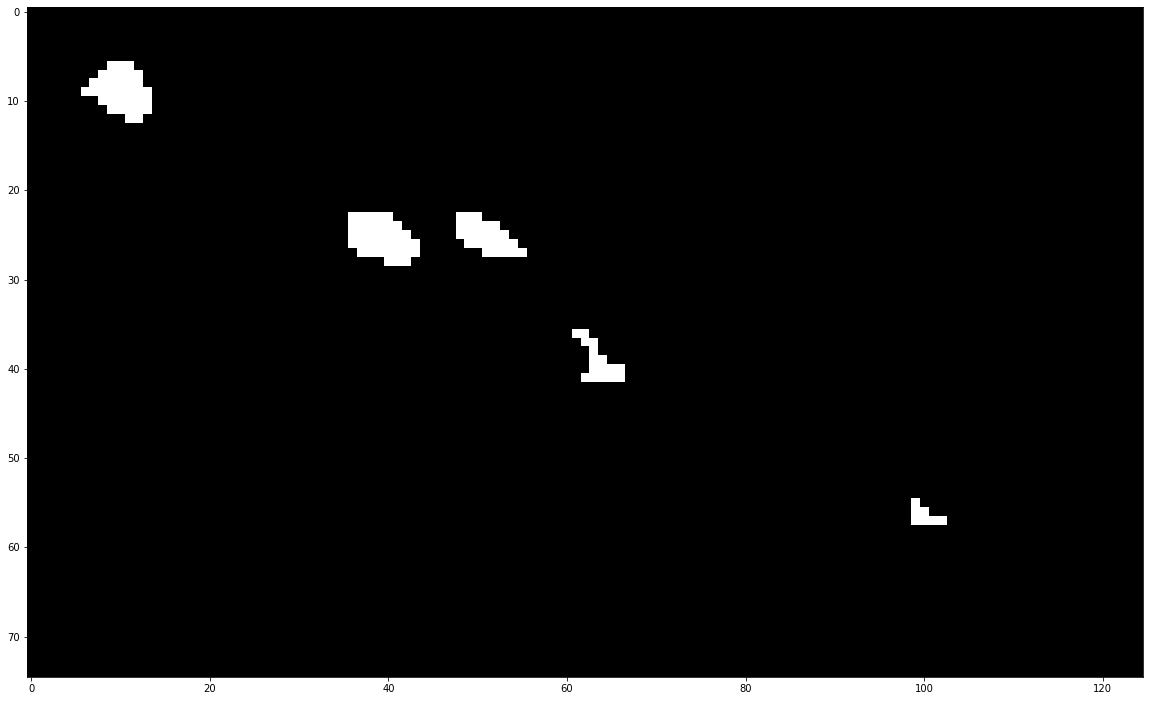

In [111]:
import cv2
import numpy as np

# Combine all binary maps (only within the road mask)
combined = cv2.bitwise_or(dark_pixels, bright_pixels)

old_mask = mask.copy()
old_mask = old_mask[300:375,100:225]
# Define erosion kernel
erode_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))  # adjust size if needed

# Erode the mask
eroded_mask = cv2.erode(old_mask, erode_kernel, iterations=1)


combined &= eroded_mask  # Apply road mask

plt.figure(figsize=(20, 20))
plt.imshow(combined, cmap='gray')

"""
# Morphological operations (close small holes, connect near blobs)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
cleaned = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel)
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)

# Find contours from cleaned binary image
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes for blobs with area >= 9 pixels
output_img = img.copy()
min_area = 9

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area >= min_area:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 0, 255), 1)  # Red box

# Optionally display
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Blobs with Red Bounding Boxes')
plt.axis('off')
plt.tight_layout()
plt.show()
"""

"\nfor i in range(len(images)):\n    plt.subplot(3, 3, i + 1)\n    if len(images[i].shape) == 2:\n        plt.imshow(images[i], cmap='gray')\n    else:\n        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))\n    plt.title(titles[i])\n    plt.axis('off')\nplt.tight_layout()\nplt.show()\n"

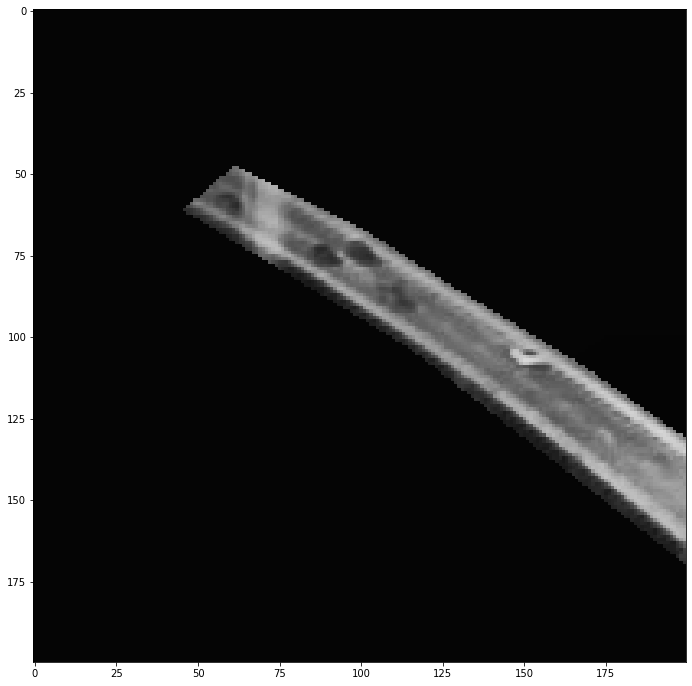

In [60]:
masked_frame = mf.copy()[250:450,50:250]

gray = cv2.cvtColor(masked_frame, cv2.COLOR_BGR2GRAY)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load and preprocess image ---

# --- CLAHE: Local contrast enhancement ---
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4,4))
clahe_img = clahe.apply(gray)

# --- Morphological filtering: Top-hat (bright) + Black-hat (dark) ---
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
tophat = cv2.morphologyEx(clahe_img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(clahe_img, cv2.MORPH_BLACKHAT, kernel)

# Combine both filters to enhance all contrast directions
enhanced = cv2.addWeighted(tophat, 0.5, blackhat, 0.5, 0)

# --- Adaptive thresholding (normal + inverted) ---
thresh_normal = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, blockSize=11, C=-5)

enhanced_inv = cv2.bitwise_not(enhanced)
thresh_inverted = cv2.adaptiveThreshold(enhanced_inv, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, blockSize=11, C=-5)

# --- Blob Detector Setup ---
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 10
params.maxArea = 1000
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False
params.minThreshold = 10
params.maxThreshold = 255

detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs on both thresholds
keypoints_normal = detector.detect(thresh_normal)
keypoints_inverted = detector.detect(thresh_inverted)
keypoints_all = keypoints_normal + keypoints_inverted

# Draw keypoints
img_keypoints = cv2.drawKeypoints(gray, keypoints_all, np.array([]),
                                  (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# --- Optional: Contours from combined threshold (for outline)
combined_thresh = cv2.bitwise_or(thresh_normal, thresh_inverted)
contours, _ = cv2.findContours(combined_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = gray.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 1)

# --- Show everything ---
titles = ['Original', 'CLAHE', 'Tophat + Blackhat', 'Threshold (normal)', 'Threshold (inverted)', 'Blob Keypoints', 'Contours']
images = [gray, clahe_img, enhanced, thresh_normal, thresh_inverted, img_keypoints, contour_img]

plt.figure(figsize=(18, 12))
plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))

"""
for i in range(len(images)):
    plt.subplot(3, 3, i + 1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
"""


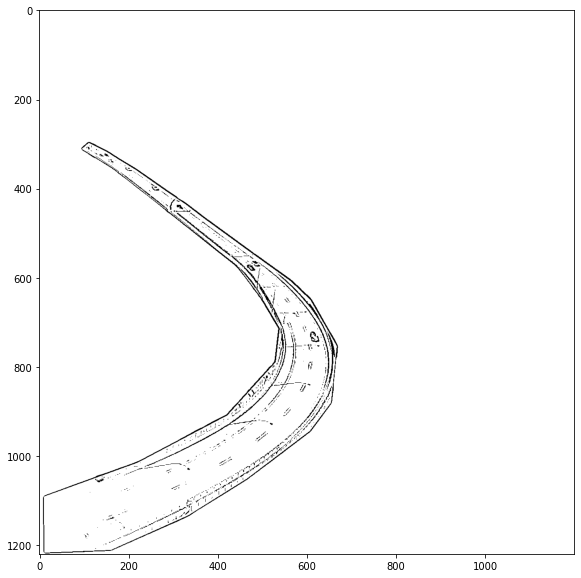

In [22]:
#apply adaptive thresholding to frame
gray = cv2.cvtColor(masked_frame, cv2.COLOR_BGR2GRAY)
adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
plt.figure(figsize=(10, 10))
plt.imshow(adaptive_threshold, cmap='gray')

In [19]:
cv2.destroyAllWindows()


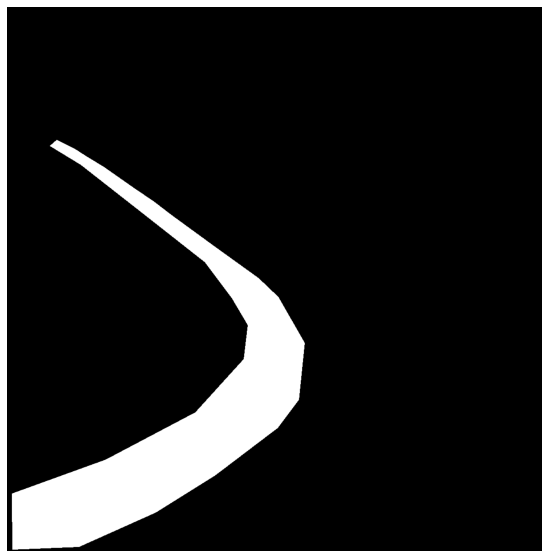

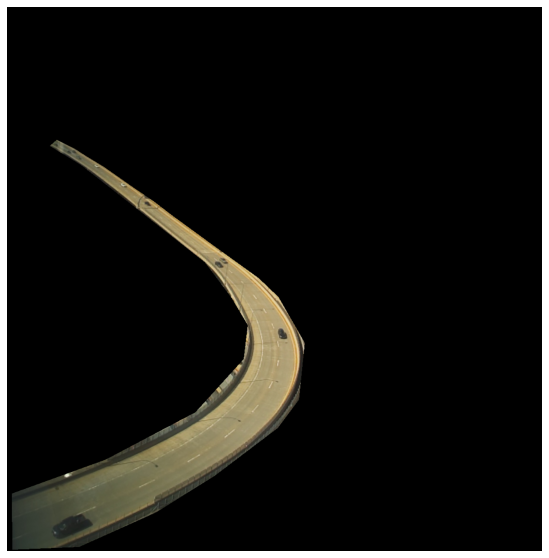

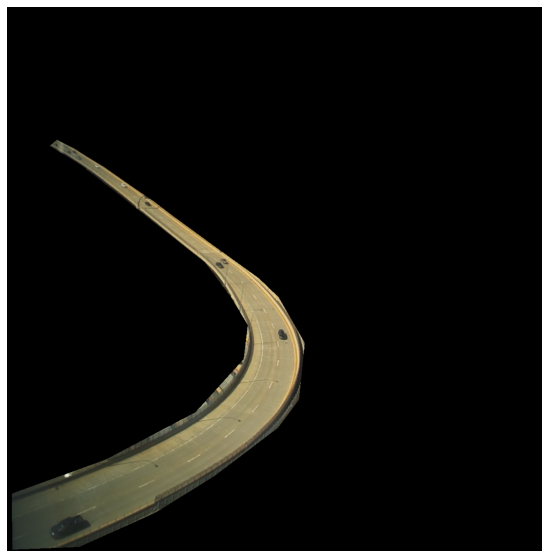

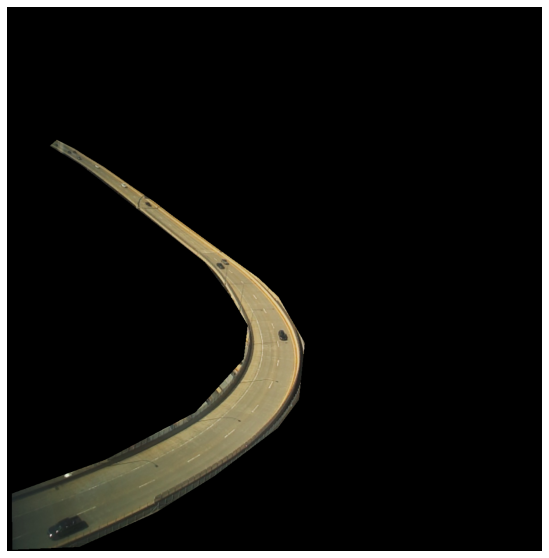

In [29]:
# Directory containing frames
frame_dir = 'test_frames/'

# Load and sort frame filenames by Unix timestamp
frame_files = sorted(os.listdir(frame_dir), key=lambda x: int(os.path.splitext(x)[0]))

# Take first 5 frames
frame_files = frame_files[:3]

# Load your road mask
mask = cv2.imread('road_mask.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.axis('off')

# Initialize Background Subtractor
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

for fname in frame_files:
    frame_path = os.path.join(frame_dir, fname)
    frame = cv2.imread(frame_path)
    frame = cv2.rotate(frame, cv2.ROTATE_180)  # Rotate frame by 180 degrees
    # Check if frame loaded correctly
    if frame is None:
        print(f'Error loading {fname}')
        continue

    # Apply road mask
    masked_frame = cv2.bitwise_and(frame, frame, mask=mask)

    # Background subtraction
    fg_mask = back_sub.apply(masked_frame)

    # Threshold to remove shadows
    _, fg_mask = cv2.threshold(fg_mask, 250, 255, cv2.THRESH_BINARY)

    # Morphological opening to reduce noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    cleaned_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)

    # Find contours for detected movements
    contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes on detected movements
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:  # remove small noise
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display result
    #cv2.imshow('Detected Motion', frame)
    #key = cv2.waitKey(0)  # Wait for key press to show next frame
    #if key & 0xFF == ord('q'):
    #    break
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(masked_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

